# Results KVLCC2

In [1]:
%load_ext kedro.extras.extensions.ipython
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

[02/26/24 08:23:18] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/extra ]8;id=79093;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=922740;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             s/extensions/ipython.py:19: KedroDeprecationWarning:                                  
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: /home/maa/dev/PHD.                           ]8;id=157118;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=638424;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/26/24 08:23:19] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/frame ]8;id=944796;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=162660;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             work/startup.py:99: KedroDeprecationWarning: project_version in                       
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[02/26/24 08:23:19] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/pa ]8;id=656984;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=388681;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             rtitioned_dataset.py:200: KedroDeprecationWarning:                                    
                             'PartitionedDataset' has been moved to `kedro-datasets` and will be                   
                             removed in Kedro 0.19.0.                                                              
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project phd                                                      ]8;id=573816;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=845617;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=39504;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=600268;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [79]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
from vessel_manoeuvring_models.prime_system import PrimeSystem
from phd.visualization.plot_prediction import plot_total_force, plot_force_components, predict, plot_compare_model_forces, plot_parameter_contributions
from vessel_manoeuvring_models.symbols import *
import matplotlib.pyplot as plt
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify, remove_functions, prime
from vessel_manoeuvring_models.parameters import df_parameters
p = df_parameters["symbol"]
import statsmodels.api as sm
import sympy as sp
from sympy import Eq, symbols, latex
import paper
from paper import save_fig, save_eq
import yaml
with open("styles.yml", mode='r') as file:
    styles = yaml.safe_load(file)

In [3]:
#%reload_kedro
ship='kvlcc2_hsva'
ship_data = catalog.load(f"{ship}.ship_data")

tests_ek_smooth = catalog.load(f"{ship}.tests_ek_smooth")

[02/26/24 08:23:40] INFO     Loading data from 'kvlcc2_hsva.ship_data' (YAMLDataSet)...         ]8;id=542635;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=468259;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/pa ]8;id=528637;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=969834;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             rtitioned_dataset.py:200: KedroDeprecationWarning:                                    
                             'PartitionedDataset' has been moved to `kedro-datasets` and will be                   
                             removed in Kedro 0.19.0.                                                              
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Loading data from 'kvlcc2_hsva.tests_ek_smooth'                    ]8;id=710465;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=811702;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PartitionedDataset)...                                                               

In [4]:
loaders = {
        
    #'Reference model' : catalog.load(f"{ship}.models_VCT_MDL")['semiempirical_covered'],
    'Physics informed ID' : catalog.load(f"{ship}.models_ID_hull")['semiempirical_covered'],
    
    #'Abkowitz VCT': catalog.load(f"{ship}.models_rudder_VCT_MDL")['Abkowitz'],
    'Abkowitz ID' : catalog.load(f"{ship}.models_ID_hull_rudder")['Abkowitz'],
    #'Martins simple ID' : catalog.load(f"{ship}.models_ID_hull_rudder2")['Martins simple'],


}

[02/26/24 08:23:47] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/__ ]8;id=727247;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=827633;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             init__.py:44: KedroDeprecationWarning: 'AbstractDataSet' has been                     
                             renamed to 'AbstractDataset', and the alias will be removed in Kedro                  
                             0.19.0                                                                                
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Loading data from 'kvlcc2_hsva.models_ID_hull'                     ]8;id=623890;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=625157;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PartitionedDataset)...                                                               

                    INFO     Loading data from 'kvlcc2_hsva.models_ID_hull_rudder'              ]8;id=768757;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=204688;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PartitionedDataset)...                                                               

In [5]:
models = {name:loader() for name,loader in loaders.items()}

In [13]:
model_PI = models['Physics informed ID']

## Captive tests

In [9]:
df_VCT_prime_raw = pd.read_csv("../../notebooks/KVLCC2 HMRI_Model Self PP.csv", index_col=0)

In [10]:
renames = {
    'Speed(m/s)':'V',
    'rps':'rev',
    "X'":"X_D",
    "Y'":"Y_D",
    "N'":"N_D",
    "RX'":"X_R",
    "RY'":"Y_R",
    "TX'":"thrust",
}
df_VCT_prime = df_VCT_prime_raw.rename(columns=renames)
df_VCT_prime['delta'] = np.deg2rad(df_VCT_prime['delta(deg)'])
df_VCT_prime['beta'] = np.deg2rad(df_VCT_prime['beta(deg)'])
df_VCT_prime.drop(columns=['delta(deg)','beta(deg)'], inplace=True)

In [14]:
df_VCT = model_PI.prime_system.unprime(df_VCT_prime, U=df_VCT_prime['V'])
df_VCT['u'] = df_VCT['V']*np.cos(df_VCT['beta'])
df_VCT['v'] = -df_VCT['V']*np.sin(df_VCT['beta'])
df_VCT['r'] = 0
df_VCT[['x0', 'y0', 'psi']]=0
df_VCT['delta_deg'] = np.rad2deg(df_VCT['delta'])
df_VCT['beta_deg'] = np.rad2deg(df_VCT['beta'])
df_VCT['N_R'] = ship_data['x_r']*df_VCT['Y_R'] 

In [20]:
styles


{
    'Experiment': {'label': 'Model test', 'color': 'black', 'style': '-', 'zorder': -10},
    'Reference model': {'label': 'Reference', 'color': 'blue', 'style': '-'},
    'Abkowitz VCT': {'label': 'Abkowitz VCT', 'color': 'magenta', 'style': '-'},
    'Physics informed ID': {'label': 'PI', 'color': 'green', 'style': '-'},
    'Abkowitz ID': {'label': 'PU', 'color': 'red', 'style': '-'},
    'Martins simple ID': {'label': 'Martins simple ID', 'color': 'magenta', 'style': '-'}
}

In [42]:
def prime_1000(df,model,units,dofs):
    df_prime = model.prime_system.prime(df, U=df['V'], units=units)

    df_prime[dofs]*=1000
    
    return df_prime 
    

[02/26/24 09:20:15] WARNING  /tmp/ipykernel_68747/1084271671.py:48: UserWarning: The figure layout  ]8;id=715733;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=999306;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             has changed to tight                                                                  
                               plt.tight_layout()                                                                  
                                                                                                                   

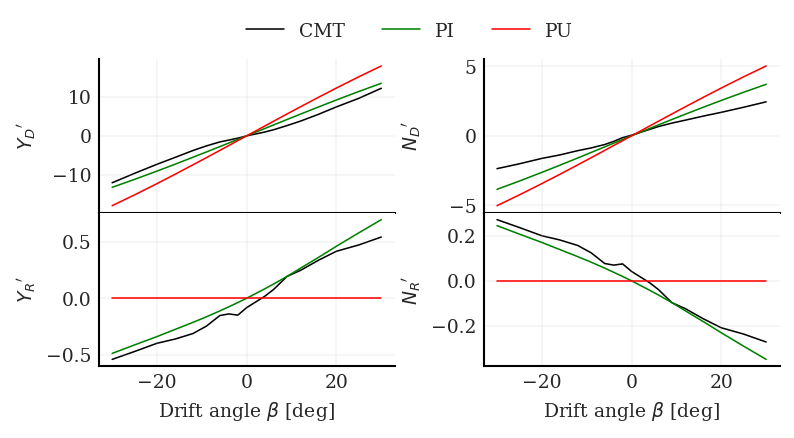

In [80]:
df = df_VCT.groupby(by='test type').get_group('Drift angle')
mask = df['V'] > 0.9
df = df.loc[mask]

units={
    'beta_deg':'angle',
    'delta_deg':'angle',
}
df_predict = predict(model=model_PI, data=df)
df_predict['beta_deg'] = np.rad2deg(df_predict['beta'])
dofs = ['Y_D','N_D','Y_R','N_R']
interesting = [
    'beta_deg',
    'V',
]
interesting+=dofs
df_predict_prime = prime_1000(df=df_predict[interesting], model=model_PI, units=units, dofs=dofs)
df_prime = prime_1000(df=df[interesting], model=model_PI, units=units, dofs=dofs)

model_PU = models['Abkowitz ID']
df_predict_PU = predict(model=model_PU, data=df)
df_predict_PU['beta_deg'] = np.rad2deg(df_predict_PU['beta'])
df_predict_PU_prime = prime_1000(df=df_predict_PU[interesting], model=model_PI, units=units, dofs=dofs) 

ncols=2
nrows=int(np.ceil(len(dofs)/ncols))
fig,axes=plt.subplots(nrows=nrows,ncols=ncols)
axes = axes.flatten()
for ax,dof in zip(axes,dofs):
    df_prime.plot(x='beta_deg', y=dof, **styles['CMT'], ax=ax)
    df_predict_prime.plot(x='beta_deg', y=dof, **styles['Physics informed ID'],ax=ax)
    df_predict_PU_prime.plot(x='beta_deg', y=dof, **styles['Abkowitz ID'], ax=ax)
    ax.set_ylabel(dof)
    ax.grid()
    ax.get_legend().set_visible(False)
        
for ax in axes[[0,1]]:
    ax.set_xlabel('')
    ax.set_xticklabels([])
    
axes[-1].set_xlabel(r'Drift angle $\beta$ [deg]')
axes[2].set_xlabel(r'Drift angle $\beta$ [deg]')

for ax,dof in zip(axes,dofs):
    ax.set_ylabel(fr"${{{dof}}}'$")
fig.align_ylabels(axes)
axes[0].legend(loc='upper center', bbox_to_anchor=(1.05, 1.35), ncol=3)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0)
fig.savefig(paper.file_path_with_nb_ref(f"KVLCC2_HMRI.svg"))